In [68]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [69]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [70]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [71]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [72]:
# reflect an existing database into a new model
Base = automap_base()


In [73]:
# reflect the tables
Base.prepare(engine, reflect=True)


In [74]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [75]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [76]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [77]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = recent_date[0]


In [78]:
last_date = session.query(Measurement.date).order_by(Measurement.date).first()

last_date

('2010-01-01')

In [79]:
#one_year_ago = last_date - dt.timedelta(days=365)
one_year_ago = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

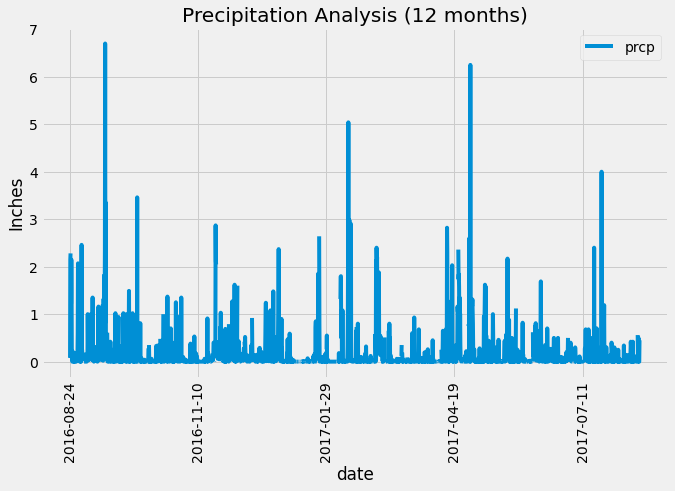

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
#last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')


# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= one_year_ago).\
            order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(figsize=(10,6), rot=90,)
plt.title("Precipitation Analysis (12 months)")
plt.ylabel("Inches")
plt.show()


In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()[0]

In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == most_active_station[0]).all()


[(54.0, 85.0, 71.66378066378067)]

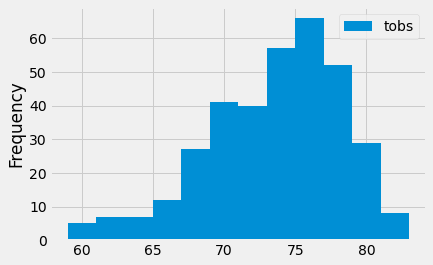

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station == most_active_station[0]).\
            filter(Measurement.date >= one_year_ago).all()

tobs_df = pd.DataFrame(tobs_data, columns=['date', 'tobs'])
tobs_df.set_index('date', inplace=True)
tobs_df.plot.hist(bins=12)

# Close session

In [87]:
# Close Session
session.close()